### Basics of inference

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run SecondAssignmentHandsOn_Helper.ipynb
%run SecondAssignmentHandsOn_Plot.ipynb
import numpy as np

In [2]:
sample = np.random.randint(18,45,50)
print(sample)

sample.mean()

[26 32 18 22 43 41 36 39 27 37 20 20 23 37 34 35 27 20 41 20 42 44 33 22
 30 42 39 21 29 30 25 40 29 34 44 37 44 22 38 18 26 37 29 21 38 40 31 19
 41 22]


31.3

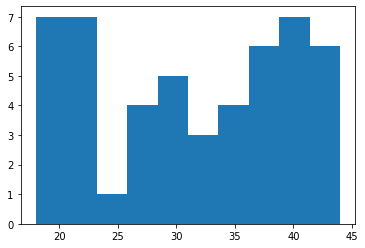

In [3]:
import matplotlib.pyplot as plt

plt.hist(sample)

plt.show()

In [4]:
from statsmodels.stats.weightstats import ztest
# statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)
# https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

ztest(sample, value = 28)

# H0: mu = 28
# H1: mu != 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%x

(2.7726877118393816, 0.005559544484431032)

In [5]:
ztest(sample, value = 28, alternative="larger")

# H0: mu = 28
# H1: mu > 28

# alpha we choose alpha = 0.05 therefore, our confidence is 95%

(2.7726877118393816, 0.002779772242215516)

If I have a p-value lower than 0.05, I would say:
- I have enough evidence to reject H0, there fore, I assume H1 with a confidence of 95%

If the p-value is larger than 0.05:
- I don't have enough evidence to reject H0, so we accept is true with a confidence of 95%

# Assignment II

Second graded assignment of the course. There is not only one way to do some of the sections. Feel free to add some extra sections if you consider them interesting!

1. Generate a list/array with the height of the population of Barcelona (1620343 inhab), where the mean is 173 cm and the standard deviation is 9.5 cm. Height is normally distributed.

In [6]:
barcelona_h_mean = 173
barcelona_h_std = 9.5
barcelona_h_size = 1620343
barcelona_h = np.random.normal(loc=barcelona_h_mean, scale=barcelona_h_std, size=barcelona_h_size)
stats.describe(barcelona_h)

DescribeResult(nobs=1620343, minmax=(125.40236747206761, 219.00460954380486), mean=172.99153945593267, variance=90.30868447293523, skewness=0.0011874670788003408, kurtosis=0.005702141199194433)

2. Plot the distribution of the population (not the mean)

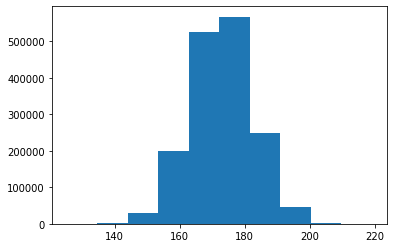

In [7]:
plt.hist(barcelona_h)

plt.show()

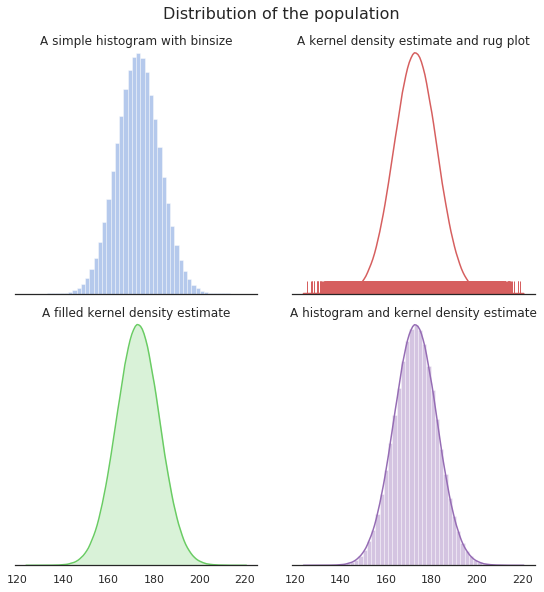

In [8]:
p_suptitle = "Distribution of the population"
#p_data = pd.DataFrame(data=barcelona_h, index=["idx"], columns=["height"])
df_barcelona_h = pd.DataFrame(data=barcelona_h, columns=["height"])
#p_data.head(5)
sns_distplot_4_subplots(df_barcelona_h, p_suptitle)

3. How many cases are considered outliers? (we can use the definition of being above/below 1.5 x IQR, or 3 x IQR if we want to be more restrictive)

<img src="https://naysan.ca/wp-content/uploads/2020/06/box_plot_ref_needed.png" alt="Girl in a jacket" width="500" height="600">

<p align="left" style="font-size:16px"><b> Calcuating Percentile by hand </b></p>

In [9]:
#Calcuating Percentile by hand
Q1 = get_percentile(df_barcelona_h,'height',25)
Q3 = get_percentile(df_barcelona_h,'height',75)
IQR = Q3 - Q1

print("Q1 --> {0}".format(Q1))
print("Q3 --> {0}".format(Q3))
print("IQR --> {0}".format(IQR))

Q1 --> 166.5935907636202
Q3 --> 179.39947320026045
IQR --> 12.805882436640246


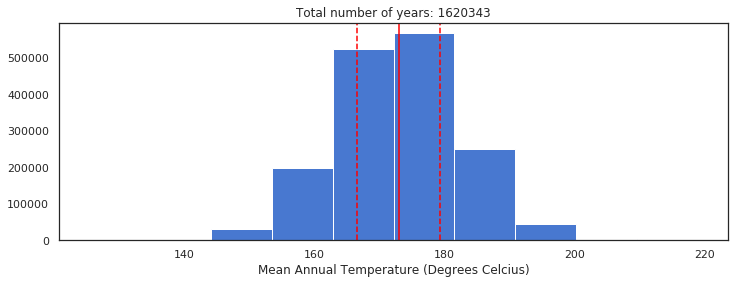

In [10]:
plt.figure(figsize=(12,4))
plt.hist(df_barcelona_h['height'])
plt.title("Total number of years: %s" % len(df_barcelona_h.index))
plt.xlabel("Mean Annual Temperature (Degrees Celcius)")
# Vertical lines for each percentile of interest
plt.axvline(Q1, linestyle='--', color='red')
plt.axvline(get_percentile(df_barcelona_h,'height',50), linestyle='-',  color='red')
plt.axvline(Q3, linestyle='--', color='red')
plt.show()

<p align="left" style="font-size:16px"><b> Using scipy.stats </b></p>

In [11]:
#Using scipy.stats
iqr(df_barcelona_h['height'])

12.805906374682053

<p align="left" style="font-size:16px"><b> Using pandas to calculate IQR </b></p>

In [12]:
df_barcelona_h.describe()

,height
count,1.620343e+06
mean,1.729915e+02
std,9.503088e+00
min,1.254024e+02
25%,1.665936e+02
50%,1.729927e+02
75%,1.793995e+02
max,2.190046e+02


In [13]:
# Computing IQR = Q3 – Q1.
Q1 = df_barcelona_h['height'].quantile(0.25)
Q3 = df_barcelona_h['height'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 --> {0}".format(Q1))
print("Q3 --> {0}".format(Q3))
print("IQR --> {0}".format(IQR))

Q1 --> 166.5935931504199
Q3 --> 179.39949952510196
IQR --> 12.805906374682053


In [14]:
min_threshold_IQR = Q1 - (1.5 * IQR)
max_threshold_IQR = Q3 + (1.5 * IQR)
print("min_threshold_IQR --> {0}".format(min_threshold_IQR))
print("max_threshold_IQR --> {0}".format(max_threshold_IQR))

min_threshold_IQR --> 147.38473358839684
max_threshold_IQR --> 198.60835908712505


In [15]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df_barcelona_h.query('@min_threshold_IQR <= height <= @max_threshold_IQR')
print("Rows inside Interquartile Range rule--> {0}".format(filtered.size))

Rows inside Interquartile Range rule--> 1609014


In [16]:
filtered.sort_values(by="height", ascending=False).reset_index().head(3)

,index,height
0,1600074,198.607561
1,1102282,198.607380
2,575208,198.607185


In [17]:
filtered.sort_values(by="height", ascending=False).reset_index().tail(3)

,index,height
1609011,371152,147.385714
1609012,350477,147.385315
1609013,1153983,147.384935


In [18]:
# Filtering outliers
filtered_outliers = df_barcelona_h[(df_barcelona_h['height'] <= min_threshold_IQR) | (df_barcelona_h['height'] >= max_threshold_IQR) ]
print("Rows outside Interquartile Range rule (outliers)--> {0}".format(filtered_outliers.size))

Rows outside Interquartile Range rule (outliers)--> 11329


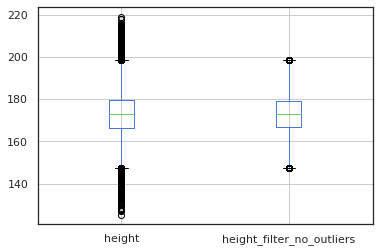

In [19]:
# Ploting the result to check the difference
df_barcelona_h.join(filtered, rsuffix='_filter_no_outliers').boxplot()

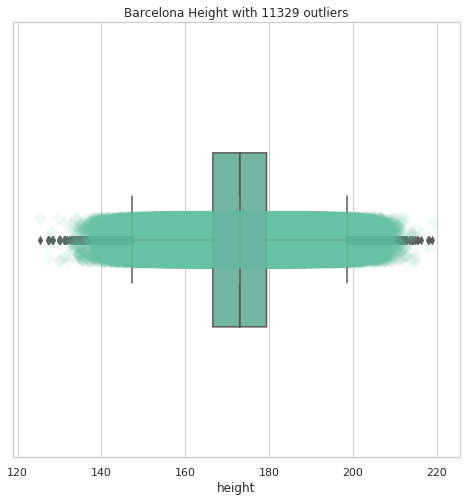

In [20]:
sns.set(style="whitegrid")
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
p = sns.boxplot(x="height", data=df_barcelona_h, showfliers = True, notch= True, width= 0.4, palette="Set2")
p = sns.stripplot(x="height", data=df_barcelona_h, color=".25", alpha=.075,  palette="Set2", orient = 'h', jitter=0.05, size=10, marker="D")
str_title =  "Barcelona Height with {0} outliers".format(filtered_outliers.size)
plt.title(str_title)
plt.show()

4. Generate a sample of 50 individuals, and using the Z-test, test $H_0 = 173$ against $H_1 \neq 173$. Use a confidence of 90%, 95%, 95.5% and 99%. Do you get different conclusions?

Remember: Confidence (and significance) are arbitrary values!! You use them as a threshold, but you never see them in the functions! Is what you use to decide if the values are extreme enough given some amount of risk

In [21]:
#We can uses pandas or numpy to generate the sample since we have the ndarray and the dataframe

In [22]:
#Using numpy
barcelona_h_sample = np.random.choice(barcelona_h, 50, replace=False)
barcelona_h_sample

array([187.29471294, 170.21608213, 160.90372626, 179.88866112,
       174.45041845, 178.08631435, 179.46068367, 164.62736235,
       162.20332059, 176.20850204, 189.02700382, 172.2131231 ,
       193.10114959, 173.01904669, 152.44020858, 157.27183593,
       173.41454183, 173.3718688 , 181.17044646, 175.78425427,
       159.43592601, 159.57656408, 173.50219616, 176.58763344,
       177.45689932, 177.60810271, 160.15805719, 159.31698852,
       177.7556503 , 175.75905394, 159.43940542, 171.55620849,
       171.9688314 , 177.00467852, 183.04687474, 167.28589304,
       173.43153014, 177.04366553, 170.12073987, 193.89965387,
       187.82052482, 171.4161649 , 163.55635161, 186.60955395,
       175.85396179, 190.43136454, 177.44444553, 167.47525995,
       176.29055724, 165.3247023 ])

In [23]:
#Using pandas
df_barcelona_h_sample = df_barcelona_h.sample(n = 50, replace=False)
df_barcelona_h_sample.head(5)

,height
727477,174.378264
452323,170.169301
205401,179.219732
1026195,178.325387
1304562,168.468246


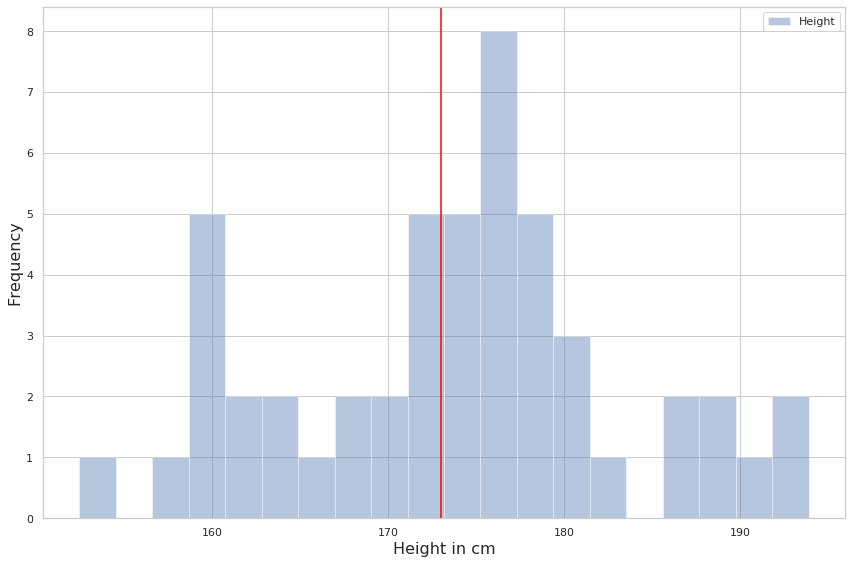

In [24]:
# Histogram that shows the distribution for our sample

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(barcelona_h_sample, bins=20, kde=False, label='Height')

ax.set_xlabel("Height in cm",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(173, color='red')
plt.legend()
plt.tight_layout()

# plt.savefig(fname='height_one_sample_2', dpi=150)
plt.show()

In [25]:
zset,pval = ztest(barcelona_h_sample, value = 173, alternative="two-sided")
print("zset--> {0}".format(zset))
print("pval--> {0}".format(pval))

zset--> 0.4139405769932967
pval--> 0.6789176261287114


In [26]:
print("𝐻0=173,𝐻1≠173")

𝐻0=173,𝐻1≠173


In [27]:
alpha = 0.1
confidence_perc = "90%"
ztest_hypothesis_determination(pval, alpha, confidence_perc)

I don't have enough evidence to reject H0. So we accept is true with a confidence of 90%


In [28]:
alpha = 0.05
confidence_perc = "95%"
ztest_hypothesis_determination(pval, alpha, confidence_perc)

I don't have enough evidence to reject H0. So we accept is true with a confidence of 95%


In [29]:
alpha = 0.045
confidence_perc = "95.5%"
ztest_hypothesis_determination(pval, alpha, confidence_perc)

I don't have enough evidence to reject H0. So we accept is true with a confidence of 95.5%


In [30]:
alpha = 0.01
confidence_perc = "99%"
ztest_hypothesis_determination(pval, alpha, confidence_perc)

I don't have enough evidence to reject H0. So we accept is true with a confidence of 99%


4.1 Draw the Z-test for the population mean

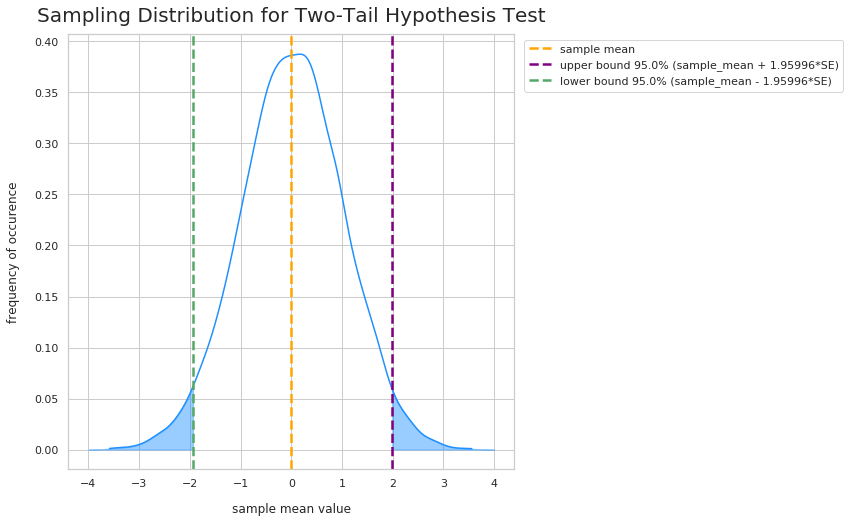

In [31]:
mu, sigma = 0, 1 # mean and standard deviation
confidence = 0.95
snd_two_tailed_z_test(mu, sigma, confidence)

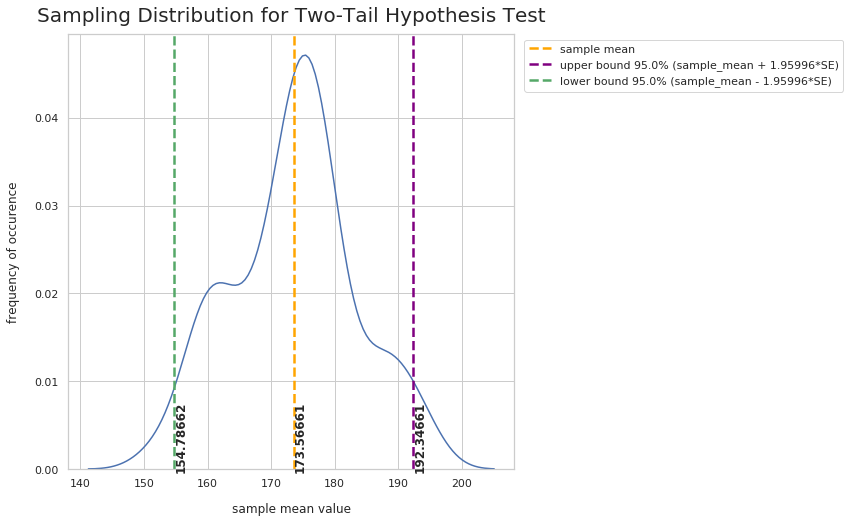

In [32]:
confidence = 0.95
nd_two_tailed_z_test(barcelona_h_sample, confidence)

4.2 Does it change a lot if we test $H_0 = 173$ against $H_1 > 173$ ? Explain the differences

In [33]:
zset,pval = ztest(barcelona_h_sample, value = 173, alternative="larger")
print("zset--> {0}".format(zset))
print("pval--> {0}".format(pval))

zset--> 0.4139405769932967
pval--> 0.3394588130643557


In [34]:
barcelona_h_sample.min(), barcelona_h_sample.max()

(152.44020857845177, 193.89965387472188)

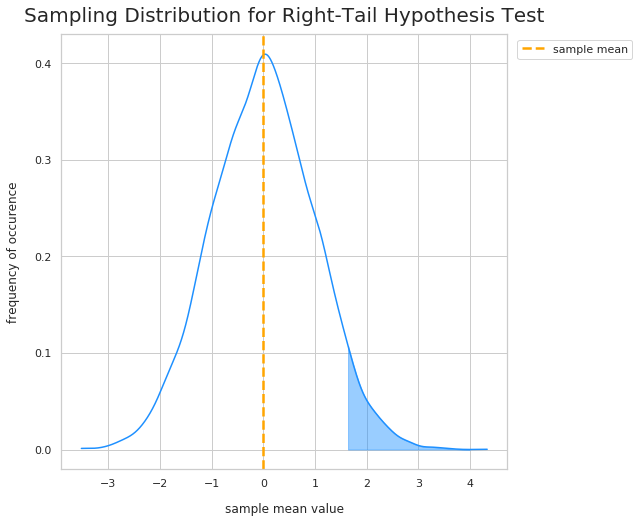

In [35]:
mu, sigma = 0, 1 # mean and standard deviation
confidence = 0.95
snd_right_tailed_z_test(mu, sigma, confidence)

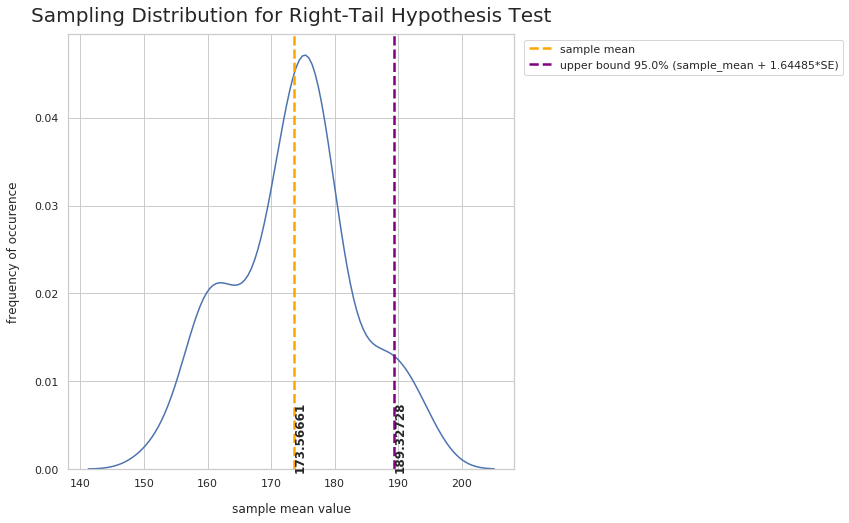

In [36]:
confidence = 0.95
nd_right_tailed_z_test(barcelona_h_sample, confidence)

5. Now we are going to generate 10000 samples of 50 individuals. For each of them, I want to apply the previous procedure, Z-test with 90, 95, 95.5 and 99% confidence! At the end, I want to see how many times I accepted $H_0$ and how many times I rejected it (which means I assume $H_1$ is happening) for each of them. Does it fit what we should expect?

Show it graphically

<p align="left" style="font-size:16px"><b> 𝐻0=173,𝐻1≠173 </b></p>

In [37]:
%%time
df = df_barcelona_h
sample_num = 1000
sample_size = 50
ztest_value = 173
ztest_alternative = "two-sided"
alpha_list = [0.1,0.05, 0.045, 0.01]
df_sample_tot, dfResults = ztest_hypothesis_determination_dist(df, sample_num, sample_size, ztest_value, ztest_alternative, alpha_list)
dfResults.head(10)

CPU times: user 1min 24s, sys: 4.29 s, total: 1min 29s
Wall time: 1min 29s


,sample_id,sample_size,alpha_id,zset,pval,hypothesis_choosen
0,0,50,0.100,[-0.039389262673988186],[0.9685800404122953],H0
1,0,50,0.050,[-0.039389262673988186],[0.9685800404122953],H0
2,0,50,0.045,[-0.039389262673988186],[0.9685800404122953],H0
3,0,50,0.010,[-0.039389262673988186],[0.9685800404122953],H0
4,1,50,0.100,[1.1065940014687519],[0.2684695019412954],H0
5,1,50,0.050,[1.1065940014687519],[0.2684695019412954],H0
6,1,50,0.045,[1.1065940014687519],[0.2684695019412954],H0
7,1,50,0.010,[1.1065940014687519],[0.2684695019412954],H0
8,2,50,0.100,[1.4874692320705407],[0.13689092359223748],H0
9,2,50,0.050,[1.4874692320705407],[0.13689092359223748],H0


In [38]:
df_sample_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
height    50000 non-null float64
dtypes: float64(1)
memory usage: 390.7 KB


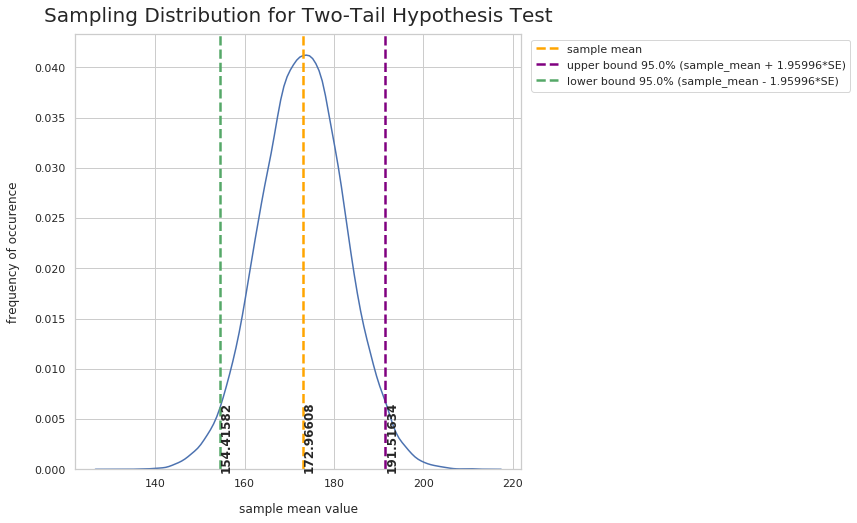

In [39]:
confidence = 0.95
nd_two_tailed_z_test(df_sample_tot.to_numpy(), confidence)

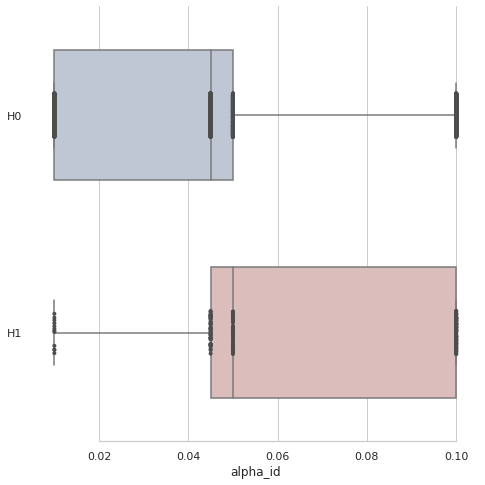

In [40]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="alpha_id", y="hypothesis_choosen", data=dfResults,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="alpha_id", y="hypothesis_choosen", data=dfResults,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [41]:
dfResultsBar = dfResults
dfResultsBar["hypothesis_choosen_new"] = dfResultsBar['hypothesis_choosen'].apply(lambda x: 0 if x == "H0" else 1 )
dfResultsBar = dfResultsBar[["alpha_id","hypothesis_choosen_new"]]
dfResultsBar = dfResultsBar.rename(columns={"hypothesis_choosen_new": "hypothesis_choosen"})
dfResultsBar = dfResultsBar.groupby(['alpha_id','hypothesis_choosen']).agg({'hypothesis_choosen': [np.size]})
#dfResultsBar = dfResultsBar.reset_index()
dfResultsBar = dfResultsBar.hypothesis_choosen.reset_index()
dfResultsBar

,alpha_id,hypothesis_choosen,size
0,0.010,0,988
1,0.010,1,12
2,0.045,0,947
3,0.045,1,53
4,0.050,0,940
5,0.050,1,60
6,0.100,0,889
7,0.100,1,111


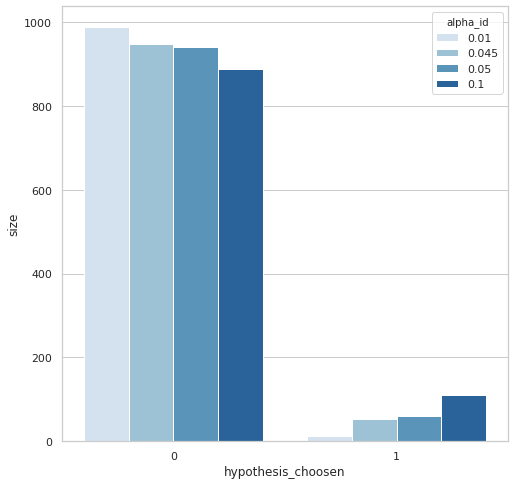

In [42]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale("linear")

sns.barplot(x = 'hypothesis_choosen', y = 'size', hue = 'alpha_id', data = dfResultsBar,
            palette = 'Blues', edgecolor = 'w')

plt.show()

6.  Replicate the previous point, testing $H_0 = 180$ against $H_1 \neq 180$. How many times have you accepted $H_0$? Can you link these results with the errors of type I and II?

<p align="left" style="font-size:16px"><b> 𝐻0=180,𝐻1≠180</b></p>

Type I error (α , also called significance level): the probability to reject H₀ (the null hypothesis) when it is true. (False positive)

Confidence level (1 - α) : ability to produce accurate intervals that include the true parameter value if many samples were to be generated

Type II error (β): the probability to FAIL to reject H₀ when it is false.(False negative)

Power of the statistical test (1- β) :the probability to reject H₀ when it is false

In [43]:
%%time
df = df_barcelona_h
sample_num = 1000
sample_size = 50
ztest_value = 180
ztest_alternative = "two-sided"
alpha_list = [0.1,0.05, 0.045, 0.01]
df_sample_tot_2, dfResults_2 = ztest_hypothesis_determination_dist(df, sample_num, sample_size, ztest_value, ztest_alternative, alpha_list)
dfResults_2.head(10)

CPU times: user 1min 28s, sys: 4.56 s, total: 1min 33s
Wall time: 1min 34s


,sample_id,sample_size,alpha_id,zset,pval,hypothesis_choosen
0,0,50,0.100,[-5.684197832799513],[1.3142807040904373e-08],H1
1,0,50,0.050,[-5.684197832799513],[1.3142807040904373e-08],H1
2,0,50,0.045,[-5.684197832799513],[1.3142807040904373e-08],H1
3,0,50,0.010,[-5.684197832799513],[1.3142807040904373e-08],H1
4,1,50,0.100,[-2.8833099251714183],[0.0039352005605092395],H1
5,1,50,0.050,[-2.8833099251714183],[0.0039352005605092395],H1
6,1,50,0.045,[-2.8833099251714183],[0.0039352005605092395],H1
7,1,50,0.010,[-2.8833099251714183],[0.0039352005605092395],H1
8,2,50,0.100,[-4.507126790354303],[6.571137091585467e-06],H1
9,2,50,0.050,[-4.507126790354303],[6.571137091585467e-06],H1


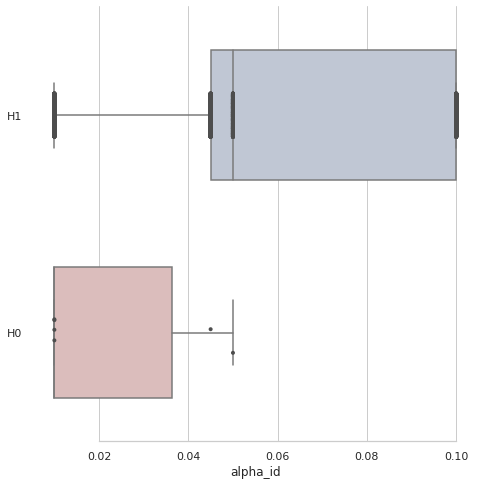

In [44]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale("linear")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="alpha_id", y="hypothesis_choosen", data=dfResults_2,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="alpha_id", y="hypothesis_choosen", data=dfResults_2,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [45]:
dfResultsBar = dfResults_2
dfResultsBar["hypothesis_choosen_new"] = dfResultsBar['hypothesis_choosen'].apply(lambda x: 0 if x == "H0" else 1 )
dfResultsBar = dfResultsBar[["alpha_id","hypothesis_choosen_new"]]
dfResultsBar = dfResultsBar.rename(columns={"hypothesis_choosen_new": "hypothesis_choosen"})
dfResultsBar = dfResultsBar.groupby(['alpha_id','hypothesis_choosen']).agg({'hypothesis_choosen': [np.size]})
#dfResultsBar = dfResultsBar.reset_index()
dfResultsBar = dfResultsBar.hypothesis_choosen.reset_index()
dfResultsBar

,alpha_id,hypothesis_choosen,size
0,0.010,0,4
1,0.010,1,996
2,0.045,0,1
3,0.045,1,999
4,0.050,0,1
5,0.050,1,999
6,0.100,1,1000


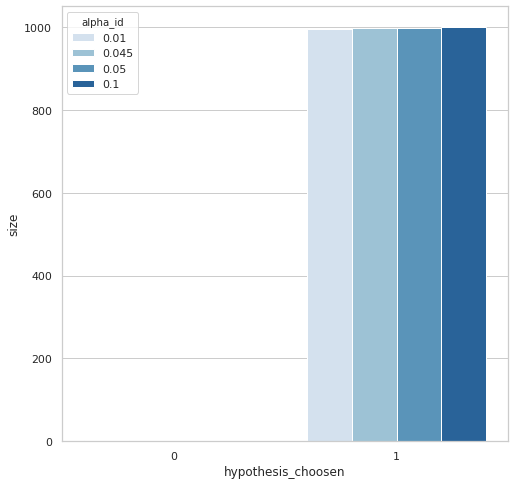

In [46]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale("linear")

sns.barplot(x = 'hypothesis_choosen', y = 'size', hue = 'alpha_id', data = dfResultsBar,
            palette = 'Blues', edgecolor = 'w')

plt.show()

In [47]:
df_res_hist = dfResults_2[["alpha_id","hypothesis_choosen"]]
#df_res_hist['alpha_id_str'] = dfResults['alpha_id'].astype(str)
df_res_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
alpha_id              4000 non-null float64
hypothesis_choosen    4000 non-null object
dtypes: float64(1), object(1)
memory usage: 62.6+ KB


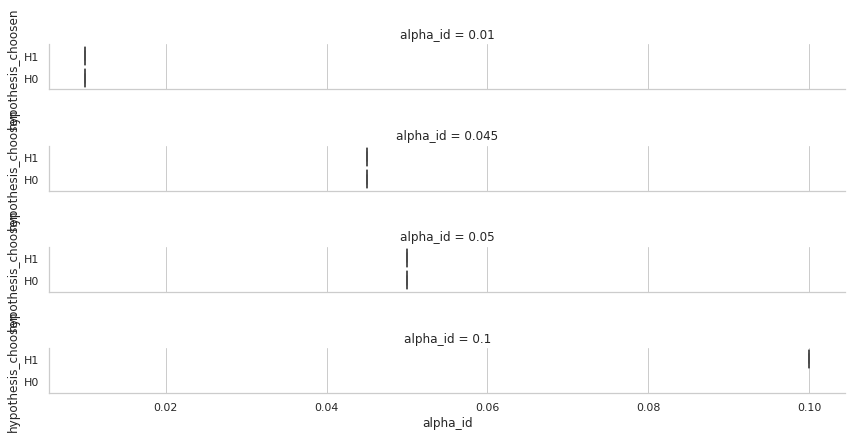

In [48]:
g = sns.catplot(x="alpha_id", y="hypothesis_choosen", row="alpha_id",
                kind="box", orient="h", height=1.5,
                data=df_res_hist, aspect=8)
#g.set(xscale="log")

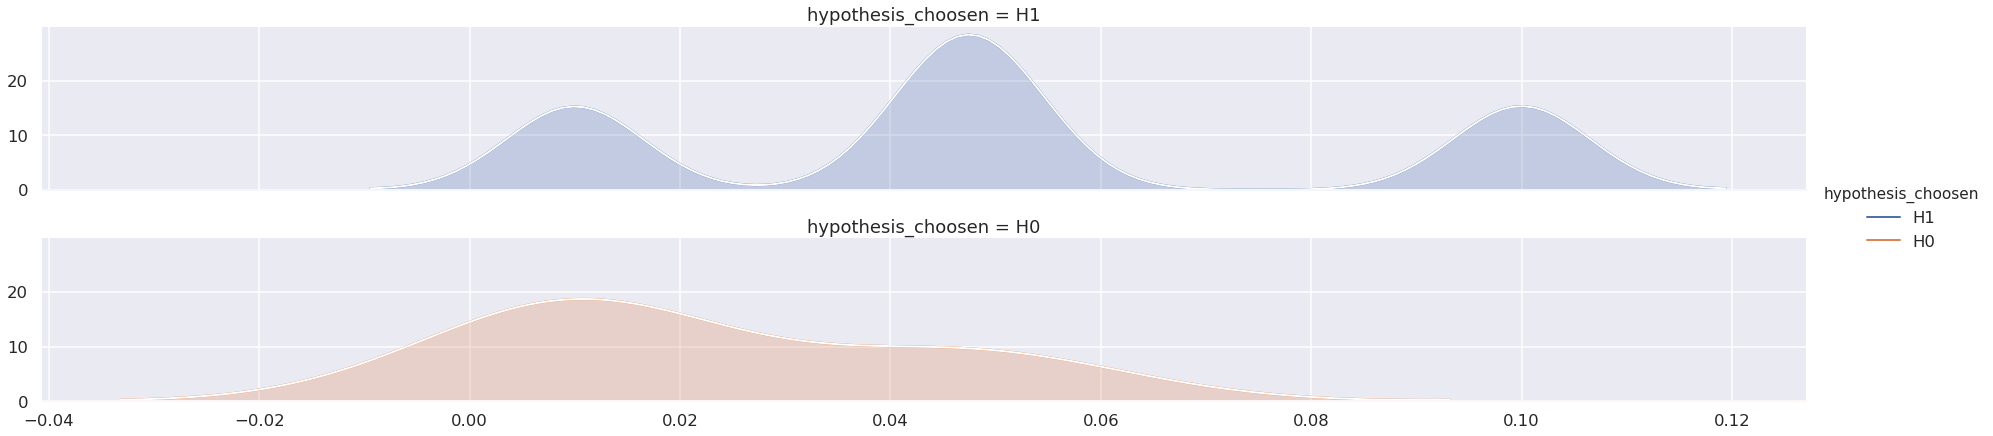

In [49]:
#f, axes = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
#sns.set()
#f, ax = plt.subplots(figsize=(8, 8))
sns.set_context('talk')
sns.set_style('darkgrid')
grid = sns.FacetGrid(df_res_hist,row = 'hypothesis_choosen', hue='hypothesis_choosen' ,height=3.2, aspect=8)
grid.map(sns.kdeplot, 'alpha_id', shade=True)
grid.map(sns.kdeplot, "alpha_id", clip_on=False, color="w", lw=2)
grid.map(plt.axhline, y=0, lw=2, clip_on=False)
#grid.set(xlim=(14, titanic_data['Age'].max()), ylim=(0,0.06))
grid.add_legend()


(Extra) 7. Test if the amount of outliers you have affects the final outcome of the test (for example, in section 5). You should face it like "is it more likely that I reject the null Hypothesis if I have more outliers?". It is an open exercise, so there is no "correct" way

HINT: Maybe this very last exercise makes more sense with only right-side outliers and the test suggested in *section 4.2*

In [50]:
%run SecondAssignmentHandsOn_Helper.ipynb
%run SecondAssignmentHandsOn_Plot.ipynb

In this case, my definition ofoutlier is a value that is more than 3 standard deviations from the mean.

In [51]:
z_scores = stats.zscore(df_sample_tot)
z_scores.size

50000

In [52]:
abs_val_z_scores = np.abs(z_scores)
filtered_entries = (abs_val_z_scores < 3).all(axis=1)
df_sample_tot_new = df_sample_tot[filtered_entries]
df_sample_tot_new.size

49862

In [53]:
print("detected outliers -->{0}".format(z_scores.size - df_sample_tot_new.size))

detected outliers -->138


Then we gonna perform the same steps as in step 5, just to compare the results

In [54]:
%%time
df = df_sample_tot_new
sample_num = 1000
sample_size = 50
ztest_value = 173
ztest_alternative = "two-sided"
alpha_list = [0.1,0.05, 0.045, 0.01]
df_sample_tot_outliers, df_Results_outliers = ztest_hypothesis_determination_dist(df, sample_num, sample_size, ztest_value, ztest_alternative, alpha_list)
df_Results_outliers.head(10)

CPU times: user 20.5 s, sys: 28.3 ms, total: 20.5 s
Wall time: 20.6 s


,sample_id,sample_size,alpha_id,zset,pval,hypothesis_choosen
0,0,50,0.100,[0.13075422174315338],[0.8959697377489131],H0
1,0,50,0.050,[0.13075422174315338],[0.8959697377489131],H0
2,0,50,0.045,[0.13075422174315338],[0.8959697377489131],H0
3,0,50,0.010,[0.13075422174315338],[0.8959697377489131],H0
4,1,50,0.100,[1.415019199513779],[0.15706286683307027],H0
5,1,50,0.050,[1.415019199513779],[0.15706286683307027],H0
6,1,50,0.045,[1.415019199513779],[0.15706286683307027],H0
7,1,50,0.010,[1.415019199513779],[0.15706286683307027],H0
8,2,50,0.100,[1.6152057558147612],[0.10626614451795612],H0
9,2,50,0.050,[1.6152057558147612],[0.10626614451795612],H0


In [55]:
dfResultsBar_outliers = df_Results_outliers
dfResultsBar_outliers["hypothesis_choosen_new"] = dfResultsBar_outliers['hypothesis_choosen'].apply(lambda x: 0 if x == "H0" else 1 )
dfResultsBar_outliers = dfResultsBar_outliers[["alpha_id","hypothesis_choosen_new"]]
dfResultsBar_outliers = dfResultsBar_outliers.rename(columns={"hypothesis_choosen_new": "hypothesis_choosen"})
dfResultsBar_outliers = dfResultsBar_outliers.groupby(['alpha_id','hypothesis_choosen']).agg({'hypothesis_choosen': [np.size]})
#dfResultsBar_outliers = dfResultsBar_outliers.reset_index()
dfResultsBar_outliers = dfResultsBar_outliers.hypothesis_choosen.reset_index()
dfResultsBar_outliers

,alpha_id,hypothesis_choosen,size
0,0.010,0,988
1,0.010,1,12
2,0.045,0,955
3,0.045,1,45
4,0.050,0,947
5,0.050,1,53
6,0.100,0,894
7,0.100,1,106


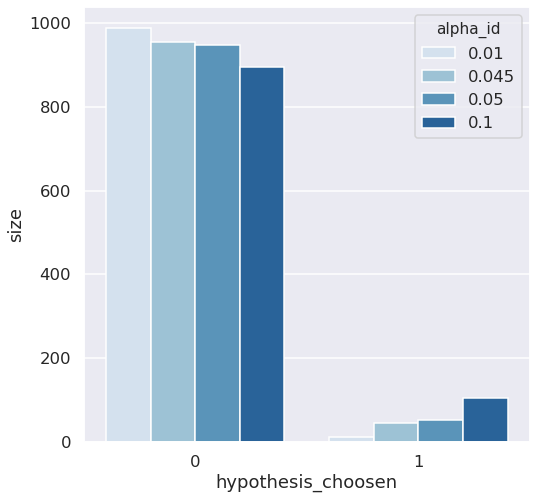

In [56]:
# Initialize the figure with a linear x axis
f, ax = plt.subplots(figsize=(8, 8))
ax.set_xscale("linear")

sns.barplot(x = 'hypothesis_choosen', y = 'size', hue = 'alpha_id', data = dfResultsBar_outliers,
            palette = 'Blues', edgecolor = 'w')

plt.show()

<p align="left" style="font-size:16px"><b> Comparing The Data Sets (with and without outliers) </b></p>

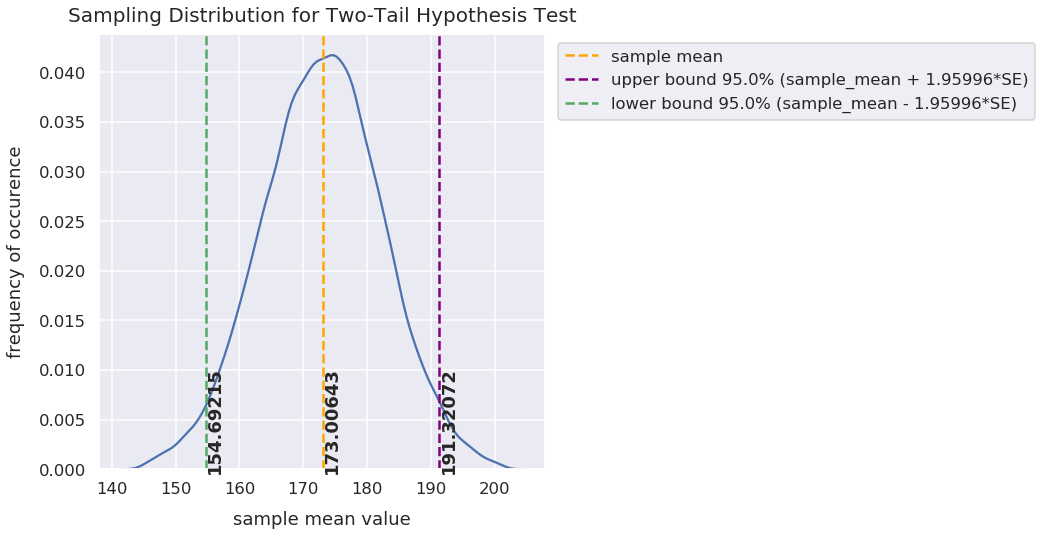

In [57]:
confidence = 0.95
nd_two_tailed_z_test(df_sample_tot_outliers.to_numpy(), confidence)

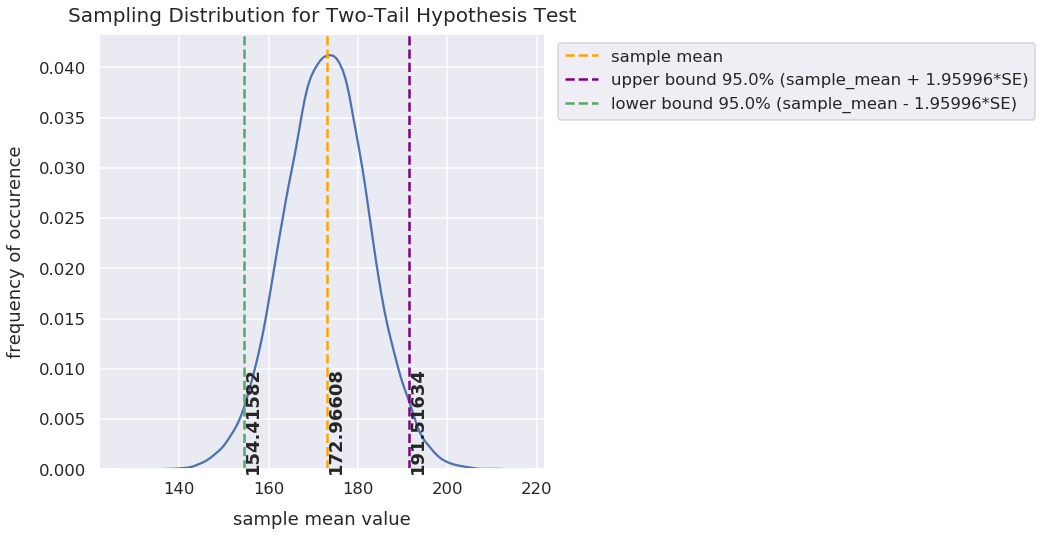

In [58]:
confidence = 0.95
nd_two_tailed_z_test(df_sample_tot.to_numpy(), confidence)